<a href="https://colab.research.google.com/github/ojware5/stat-220-pt-2/blob/main/stat_220_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW4.ipynb)

# Stat 220 — Homework 4:

**Instructions**
- Answer all questions. Show all work for full credit.
- Use Python (NumPy/Matplotlib/SciPy) to compute values and make plots.
- When a plot is requested, label axes and include a legend.
- You may add cells as needed.

In [51]:

# Feel free to add any imports you want here.
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom
from scipy.optimize import minimize

## Data (used in Q1–Q4)
We use this small dataset throughout Questions 1–4:

In [12]:

x = np.array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])
n = len(x)
x


array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])

## Question 1 — Likelihood Function Practice

You are given the dataset:
\[
x = (1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5).
\]



**(a)** Derive the **likelihood function**  if the data are assumed to come from an **Exponential($\lambda$)** distribution **with fixed $\lambda = 0.5$**. Then **evaluate** the likelihood at the given data.




In [13]:
# (λ)^n exp(-λ∑xi)
# (0.5)^10 exp(-0.5∑xi)
l = 0.5
likelihood = (l**n)*np.exp(-l*np.sum(x))
print(likelihood)


6.307844586963343e-09


**(b)** Derive the likelihood function if the data are assumed to come from a **Normal($\mu,\sigma^2$)** distribution **with fixed $\mu = 2$, $\sigma = 1$**. Then **evaluate** that likelihood at the data.

In [14]:
# (2πσ^2)^-n/2 * exp[1/2σ^2 * Σ(xi - μ)^2]
# (2π1^2)^-10/2 * exp[1/2*1^2 * Σ(xi - 2)^2]
m, s = 2, 1
likelihood = (2*np.pi*s**2) **(-n/2) * np.exp(-1/(2*s**2) * np.sum((x - m)**2))
print(likelihood)

4.312274960371929e-10


## Question 2

Assume the data are i.i.d. **Normal($\mu,\sigma^2$)** with both $\mu$ and $\sigma^2$ **unknown**.



**(a)** Compute these MLEs for $\mu$ and $\sigma$ for the dataset.  


In [36]:
mu_hat = np.sum(x)/len(x)
sig_hat = np.sqrt(np.sum((x-mu_mle)**2)/len(x))
print(f'mu is {mu_mle:.4f}')
print(f'sigma is {sigma_mle: .4f}')

mu is 2.3900
sigma is  1.5241


**(b)** Plot a **histogram** of the data with the **fitted Normal density** overlaid.

Text(0.5, 1.0, 'Normal fit (MLE): mu=2.39, sigma=1.52')

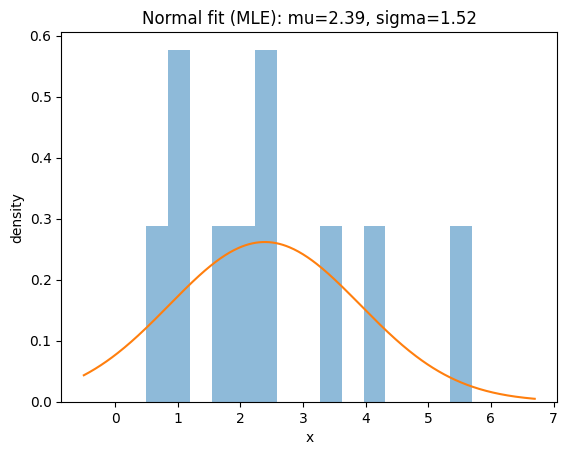

In [37]:
n = len(x); xbar = float(np.mean(x)); sigma = sig_hat

def ll_norm_mu(mu, sigma=sigma):
    return np.sum(np.log(norm.pdf(x, mu, sigma)))


sigma_hat = float(np.sqrt(np.mean((x - xbar)**2)))
plt.figure(); _ = plt.hist(x, bins=15, density=True, alpha=0.5)
xx = np.linspace(x.min()-1, x.max()+1, 400)
plt.plot(xx, norm.pdf(xx, xbar, sigma_hat))
plt.xlabel("x"); plt.ylabel("density"); plt.title(f"Normal fit (MLE): mu={xbar:.2f}, sigma={sigma_hat:.2f}")

## Question 3

Assume the data are i.i.d. **Exponential($\lambda$)** with **unknown** rate $\lambda$.

**(c)** Compute $\hat{\lambda}$.  


**(a)** Compute the MLE for $\lambda$.  


In [39]:
lam_hat = 1 / np.mean(x)
print(f'lambda is {lam_hat:.4f}')

lambda is 0.4184


**(b)** Plot a histogram of the data with the **fitted Exponential** density overlaid.

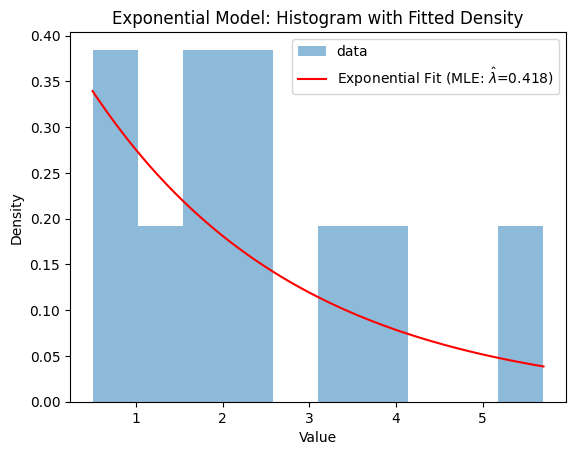

In [40]:
plt.figure()
plt.hist(x, bins=10, density=True, alpha=0.5, label="data")
xx = np.linspace(x.min(), x.max(), 100)
plt.plot(xx, expon.pdf(xx, scale=1/lam_hat), color='red', label=f'Exponential Fit (MLE: $\\hat{{\\lambda}}$={lambda_hat:.3f})')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Exponential Model: Histogram with Fitted Density")
plt.legend()
plt.show()

## Question 4 — Model Comparison (Visual + AIC)



**(a)** Visually compare your overlaid fits from Q2 and Q3. Which model seems better?  

Looking, it seems that neither graph fits the data set great. I might say exponential since there is more density on the left side.

**(b)** Compute **AIC** for both models using the log-likelihoods at the MLEs:
$$
\mathrm{AIC} = -2\,\ell(\hat{\theta}) + 2k,
$$
where $k$ is the number of parameters (Normal: $k=2$ for $\mu,\sigma$; Exponential: $k=1$).  

In [42]:
ll_n = np.sum(np.log(norm.pdf(x, mu_hat, sig_hat)))
ll_e = np.sum(np.log(expon.pdf(x, scale=1/lam_hat)))

def aic(loglik, k): return -2*loglik + 2*k
AIC_norm  = aic(ll_n, 2)
AIC_exp   = aic(ll_e, 1)

print(f"Normal is {AIC_norm:.2f}")
print(f"Exponential is {AIC_exp:.2f}")


Normal is 40.81
Exponential is 39.43


**(c)** Which model is preferred by AIC? Briefly justify.

Exponential because the lower AIC is better and 39.43 < 40.81

## Question 5 — Regression under Different Losses

Consider the regression dataset (note the last point is a potential outlier):
\[
x_reg = (1,2,3,4,5,6,7,8),\quad
y_reg = (2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0).
\]

We fit $y = \beta_0 + \beta_1 x$ under three losses.



**(a)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a squared error loss function.


In [70]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0])

from sklearn.linear_model import LinearRegression

reg_prep = LinearRegression()

mod_reg = reg_prep.fit(x,y)

beta_zero = mod_reg.intercept_
beta_one = mod_reg.coef_

print(f'Beta0 is {beta_zero:.4f}')
print(f'Beta1 is {beta_one[0]:.4f}')

Beta0 is -3.5000
Beta1 is 3.1750


**(b)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming an absolute loss function.


In [71]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([2.1,3.9,6.0,8.2,9.8,12.1,14.2,30.0])

def loss_L1(params):
    beta_zero, beta_one = params
    r = y - (beta_zero + beta_one*x)
    return np.sum(np.abs(r))

res_L1 = minimize(loss_L1, x0=[0, 1], method="Nelder-Mead")
beta_0, beta_1 = res_L1.x

print(f'Beta0 is {beta_0:.4f}')
print(f'Beta1 is {beta_1:.4f}')

Beta0 is 0.0015
Beta1 is 2.0283


**(c)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a loss function that is equal to the largest difference $y - \hat{y}$


In [72]:
def max_loss(params):
  beta0, beta1 = params
  r = np.abs(y - (beta0 + beta1*x))
  return np.max(r)

res_max = minimize(max_loss, x0=[0, 1], method="Nelder-Mead")
beta0, beta1 = res_max.x

print(f'Beta0 is {beta_0:.4f}')
print(f'Beta1 is {beta_1:.4f}')

Beta0 is 0.0015
Beta1 is 2.0283


**(d)** Plot the data with **all three** fitted lines on the same axes.  


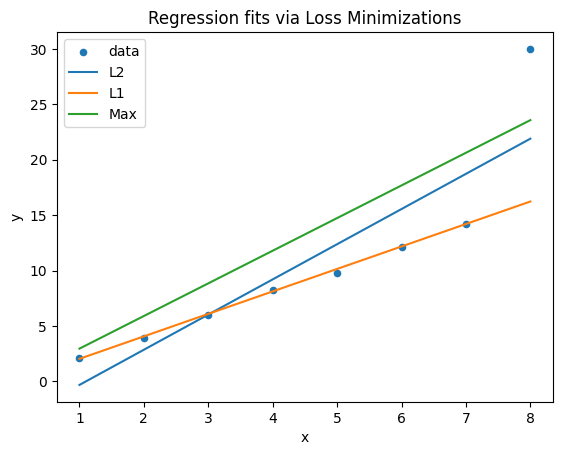

In [84]:
plt.figure()
plt.scatter(x, y, s=20, label="data")
xx = np.array([x.min(), x.max()])
plt.plot(xx, beta_zero + beta_one*xx, label="L2")
plt.plot(xx, beta_0 + beta_1*xx, label="L1")
plt.plot(xx, beta0 + beta1*xx, label="Max")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Regression fits via Loss Minimizations")
plt.legend()
plt.show()
